importing the necessary libraries

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

Loading the dataset and selecting the desired categories

In [ ]:
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
data_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)


Data Preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)
y_train = data_train.target
y_test = data_test.target


Model Selection and Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

 Evaluation

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8894806924101198


 Predictions

In [ ]:
new_documents = ["This is a new document about atheism",
                 "I have a question about computer graphics",
                 "I need some medical advice",
                 "What are the beliefs of Christianity?"]

X_new = vectorizer.transform(new_documents)
predictions = clf.predict(X_new)

for document, category in zip(new_documents, predictions):
    print(f"Document: {document}")
    print(f"Predicted Category: {data_train.target_names[category]}\n")


Document: This is a new document about atheism
Predicted Category: alt.atheism

Document: I have a question about computer graphics
Predicted Category: comp.graphics

Document: I need some medical advice
Predicted Category: sci.med

Document: What are the beliefs of Christianity?
Predicted Category: soc.religion.christian



Bar Plot of Class Distribution

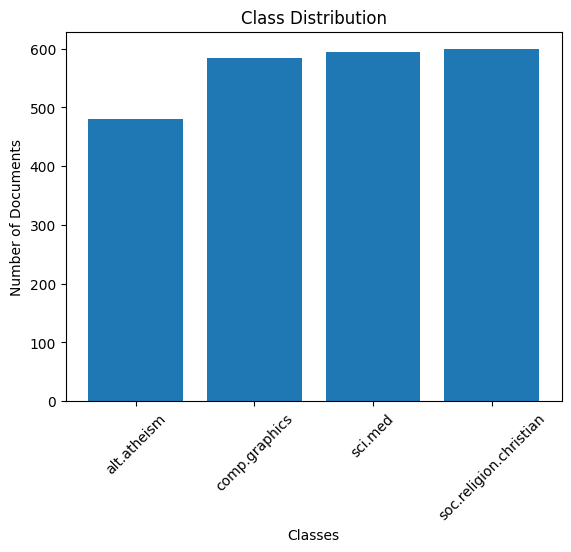

In [9]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_counts = np.bincount(y_train)

# Plot bar plot of class distribution
plt.bar(data_train.target_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Documents')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

